# Golden Section Method
The Golden Section Method is an interval reduction technique used to find the maximum or minimum of a unimodal function (a function with one peak or trough) without using derivatives.

It works by repeatedly narrowing the interval where the optimum lies, using the golden ratio (≈ 0.618) to choose interior points efficiently.

### Algorithm
- Start with an interval $[a, b]$ where the function is known to be unimodal.
- At each step, pick **two interior points** that split the interval according to the **golden ratio** (=0.618).
- Evaluate the function at these points.
- Keep the subinterval that contains the maximum.
- Repeat until the interval is sufficiently small.


## Example1

Let's use golden section on 
$$
f(x) = - (x - 2)^2 + 4
$$

First the plot:

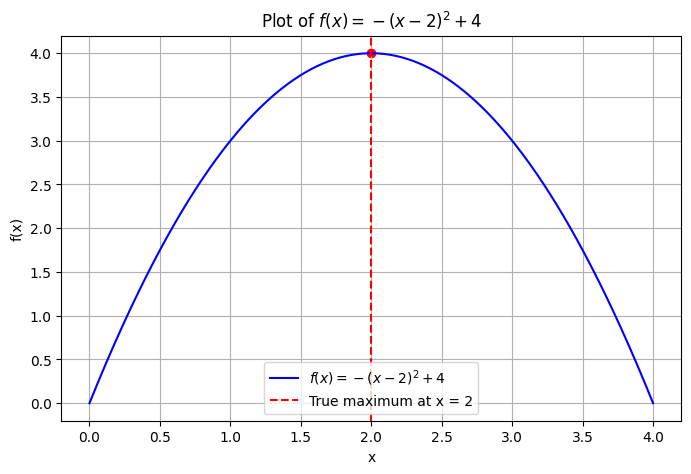

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# Define the function
f = lambda x: -(x - 2)**2 + 4

# Create x values
x = np.linspace(0, 4, 400)
y = f(x)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$f(x) = -(x - 2)^2 + 4$', color='blue')
plt.axvline(2, color='red', linestyle='--', label='True maximum at x = 2')
plt.scatter([2], [f(2)], color='red')

plt.title('Plot of $f(x) = -(x - 2)^2 + 4$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()



Find the maximum of 

$$
f(x) = - (x - 2)^2 + 4
$$

This is a parabola with its maximum at $x = 2$.

We will search in $[0, 4]$.

---

### Step 1: Initial Interval

$$
a = 0, \quad b = 4
$$

---

### Step 2: Compute Interior Points

$$
x_1 = b - \tau (b - a)
$$

$$
x_2 = a + \tau (b - a)
$$

where $\tau = 0.618$.

So,

$$x_1 = 4 - 0.618 \times (4 - 0) = 1.528$$
$$x_2 = 0 + 0.618 \times (4 - 0) = 2.472$$

---

### Step 3: Evaluate $f(x)$

$$
f(1.528) = - (1.528 - 2)^2 + 4 = 3.778
$$
$$
f(2.472) = - (2.472 - 2)^2 + 4 = 3.778
$$

---

### Step 4: Decide New Interval

- If $f(x_1) < f(x_2)$, the maximum lies between $x_1$ and $b$.
- If $f(x_1) > f(x_2)$, the maximum lies between $a$ and $x_2$.

Since they are equal, you can pick either. For example:

$$
a = x_1 = 1.528, \quad b = 4
$$

Repeat this process with the new interval.

---

### Repeat

Keep repeating until $b - a$ is very small.  
The final midpoint is the approximate maximum.

---
### Result

After a few iterations, you will find:

$$
x_{\text{max}} \approx 2, \quad f(x_{\text{max}}) = 4.
$$

---

This method works **without derivatives** and is useful when the function is hard to differentiate.


In [1]:
import math

def golden_section_max(f, a, b, tol=1e-5):
    tau = (math.sqrt(5) - 1) / 2  # ≈ 0.618
    x1 = b - tau * (b - a)
    x2 = a + tau * (b - a)

    while abs(b - a) > tol:
        if f(x1) < f(x2):
            a = x1
            x1 = x2
            x2 = a + tau * (b - a)
        else:
            b = x2
            x2 = x1
            x1 = b - tau * (b - a)

    x_max = (a + b) / 2
    return x_max, f(x_max)


f = lambda x: -(x - 2)**2 + 4 # f(x) = -(x - 2)^2 + 4

# Call the golden section method
x_max, f_max = golden_section_max(f, 0, 4)
print(f"Approximate maximum at x = {x_max:.5f}, f(x) = {f_max:.5f}")


Approximate maximum at x = 2.00000, f(x) = 4.00000


## EXAMPLE2 (Practical Application)
#### Optimizing the Shape of an Airfoil for Maximum Lift
In aeronautical engineering, you often design airfoils (wing cross-sections) to maximize lift or minimize drag.
Suppose you have an angle of attack $\alpha$ (the angle between the wing and airflow) that affects the lift coefficient $C_L$.

In practice, the lift coefficient follows a curve like this:

At low angles, lift increases with $\alpha$.

Beyond a certain angle, lift decreases due to stall.

So, $C_L(\alpha)$ is unimodal — it has one maximum.




Define:

$a = 0.1$, $b = 0.002$ (typical for illustration)

So, $C_L(\alpha) = 0.1 \alpha - 0.002 \alpha^2$

Use the Golden Section Method to find the $\alpha$ that gives maximum lift.

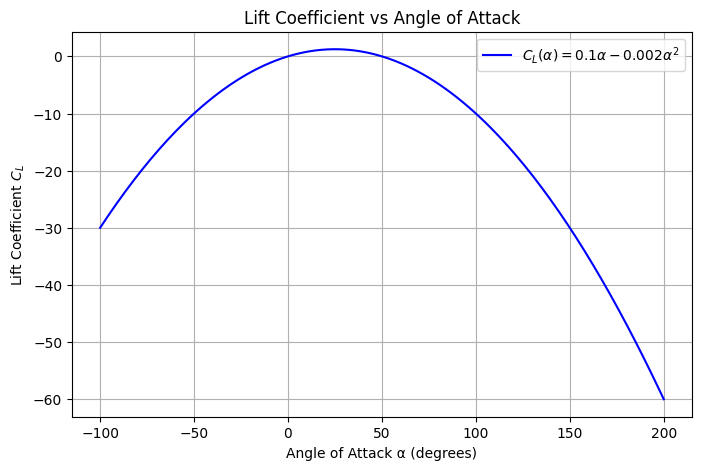

In [19]:
# Actual curve
import numpy as np
import matplotlib.pyplot as plt

# Define the lift coefficient function
C_L = lambda alpha: 0.1 * alpha - 0.002 * alpha**2

# Create a range of alpha values
alpha = np.linspace(-100, 200, 200)
CL_values = C_L(alpha)

# Plot the lift coefficient curve
plt.figure(figsize=(8, 5))
plt.plot(alpha, CL_values, label=r'$C_L(\alpha) = 0.1\alpha - 0.002\alpha^2$', color='blue')

plt.title('Lift Coefficient vs Angle of Attack')
plt.xlabel('Angle of Attack α (degrees)')
plt.ylabel('Lift Coefficient $C_L$')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Define lift coefficient as a function of angle of attack (in degrees)
C_L = lambda alpha: 0.1 * alpha - 0.002 * alpha**2

# Search for optimal angle between 0° and 20°
alpha_max, CL_max = golden_section_max(C_L, 0, 20)
print(f"Optimal angle of attack: {alpha_max:.2f} degrees")
print(f"Maximum lift coefficient: {CL_max:.4f}")

Optimal angle of attack: 20.00 degrees
Maximum lift coefficient: 1.2000
